<center>
    <h1> ILI285 - Computación Científica I  / INF285 - Computación Científica </h1>
    <h2> Interpolation: Splines </h2>
    <h2> [[S]cientific [C]omputing [T]eam](#acknowledgements)</h2>
    <h2> Version: 1.21</h2>
</center>

## Table of Contents
* [Introduction](#intro)
* [Splines](#sp)
* [Properties](#pr)
* [Solving](#so)
* [The additional Property](#ad)
* [Exercises](#ex)
* [Acknowledgements](#acknowledgements)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy import interpolate
import ipywidgets as widgets
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
from scipy.interpolate import CubicSpline
M=8

<div id='intro' />
## Introduction

Previously in our jupyter notebooks, we learn about interpolation. Methods like Newton's Divided Difference, Lagrange, among others. Other alternative for interpolate a set of data points is using ** Cubic Splines**.
This technique, avoids the Runge's Phenomenon and creates a 3-degree polynomial easily.

<div id='sp' />
## Splines

The most common spline is the linear spline. Given a set of points $(x_{1},y_{1}), (x_{2},y_{2}),...,(x_{n},y_{n}) $, this spline connects each point creating a non-smooth curve. However, this polynomial haves a problem. It's no smooth curve! For to avoid this problem, **the cubic splines creates a set of 3-degree polynomial (specifically n-1 polynomials)**... a much better curve.

 

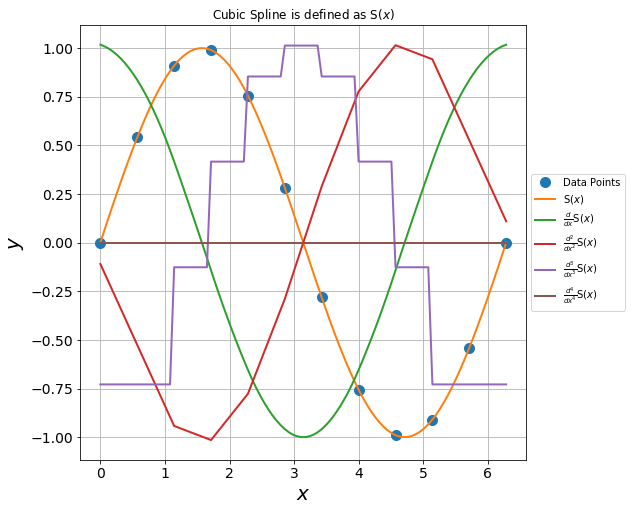

In [2]:
# Code based on Example from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline

# The data
x = np.linspace(0,2*np.pi,12)
y = np.sin(x)

# Building interpolation object
cs = CubicSpline(x, y)

# Defining a finer mesh to plot the function
xx = np.linspace(0,2*np.pi,100)

#Interpolating the date with the spline
yy = cs(xx)
yy1 = cs(xx, 1)
yy2 = cs(xx, 2)
yy3 = cs(xx, 3)
yy4 = cs(xx, 4)

# Plotting the splines and its derivatives
plt.figure(figsize=(M,M))
plt.plot(x,y,'.',markersize=20,label=r'Data Points')
plt.plot(xx,yy, linewidth=2, label=r'S$(x)$')
plt.plot(xx,yy1, linewidth=2, label=r'$\frac{d}{dx}$S$(x)$')
plt.plot(xx,yy2, linewidth=2, label=r'$\frac{d^2}{dx^2}$S$(x)$')
plt.plot(xx,yy3, linewidth=2, label=r'$\frac{d^3}{dx^3}$S$(x)$')
plt.plot(xx,yy4, linewidth=2, label=r'$\frac{d^4}{dx^4}$S$(x)$')

plt.title(r'Cubic Spline is defined as S$(x)$')
plt.axis('tight')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


The orange curve is generated with cubic splines (using the scipy implementation). The other colors are the **derivatives** of the Cubic Spline as indicated in the legend.
However, if we thinks about this curve, we can say that exists an **infinitely many** quantity of polynomials such that meets all the points. Our goal is to create an unique polynomial. Given this condition, there is 4 properties that defines the cubic spline we are looking for. 

<div id='pr'/>
## Properties of Splines

When we want creates a spline of **n** data points, we obtains a set of **n-1** 3-degree polynomials. For example:
Given a set of points $(x_{1},y_{1}), (x_{2},y_{2}),...,(x_{n},y_{n})$, the splines is:

\begin{equation} S_{1}(x) = y_{1} + b_{1}(x-x_{1}) + c_{1}(x-x_{1})^{2} + d_{1}(x-x_{1})^{3} \\ 
                 S_{2}(x) = y_{2} + b_{2}(x-x_{2}) + c_{2}(x-x_{2})^{2} + d_{2}(x-x_{2})^{3} \\
                 ... \\
                 ... \\
                 ... \\
                 S_{n-1}(x) = y_{n-1} + b_{n-1}(x-x_{n-1}) + c_{n-1}(x-x_{n-1})^{2} + d_{n-1}(x-x_{n-1})^{3}
\end{equation}

Thus, our goal is obtains the $y, b, c$ and $d$ coefficients. With this values, we are creating the spline $S(x)$ that meets all the data points. This spline have the next properties:

## Property 1 (Are the points connected?)

The first property checks if each x-coordinate reachs the correspondant y-coordinate in the spline $S(x)$. Thus, checks if the spline meets the data points.

$$S_{i}(x_{i}) = y_{i}$$ $$ S_{i}(x_{i+1}) = y_{i+1}$$ 

$$i \in [1,n-1]$$


## Property 2 (Slope Continuity)

The second property ensures that the slopes of the splines at the points' neighborhood to be equals. This guarantees the smoothly of $S(x)$

$$S'_{i-1}(x_{i}) = S'_{i}(x_{i})$$

$$i \in [2,n-1]$$

## Property 3 (Curvature Continuity)

This property ensure that the curvature between differents polynomials will be equal at the neighborhood of points, avoiding abrupt changes of the curve at the data points. 

$$S''_{i-1}(x_{i}) = S''_{i}(x_{i})$$

$$i \in [2,n-1]$$

<div id='so' />
## Solving the system 

If we have **n points**, we know that our splines will be composed of **n-1 curves** $S_{i}(x)$. We have too, **(3n-3) unknowns variables** ($b_{i}, c_{i}, d_{i}$ for each spline). However, we can build a system of equations for find this variables. How can i do this? Easy.. Using the previous properties!

Using the previously defined splines for n points:
\begin{equation} S_{1}(x) = y_{1} + b_{1}(x-x_{1}) + c_{1}(x-x_{1})^{2} + d_{1}(x-x_{1})^{3} \\ 
                 S_{2}(x) = y_{2} + b_{2}(x-x_{2}) + c_{2}(x-x_{2})^{2} + d_{2}(x-x_{2})^{3} \\
                 \vdots \\
                 S_{n-1}(x) = y_{n-1} + b_{n-1}(x-x_{n-1}) + c_{n-1}(x-x_{n-1})^{2} + d_{n-1}(x-x_{n-1})^{3}
\end{equation}

We need too, the first derivatives of this curves:
\begin{equation} S'_{1}(x) = b_{1} + 2c_{1}(x-x_{1}) + 3d_{1}(x-x_{1})^{2} \\ 
                 S'_{1}(x) = b_{2} + 2c_{2}(x-x_{2}) + 3d_{2}(x-x_{2})^{2} \\
                 \vdots \\
                 S'_{n-1}(x) = b_{n-1} + 2c_{n-1}(x-x_{n-1}) + 3d_{n-1}(x-x_{n-1})^{2} \\
\end{equation}

And its second derivatives:
\begin{equation} S''_{1}(x) = 2c_{1} + 6d_{1}(x-x_{1}) \\ 
                 S''_{2}(x) = 2c_{2} + 6d_{2}(x-x_{2}) \\ 
                 \vdots \\
                 S''_{n-1}(x) = 2c_{n-1} + 6d_{n-1}(x-x_{n-1}) \\ 
\end{equation}

Using the first property, we get **(n-1) equations}**:

\begin{equation} b_{1}(x_{2}-x_{1}) + c_{1}(x_{2}-x_{1})^2 + d_{1}(x_{2}-x_{1})^3 = y_{2} - y_{1} \hspace{1cm}(1)\\  
                 b_{2}(x_{3}-x_{2}) + c_{2}(x_{3}-x_{2})^2 + d_{2}(x_{3}-x_{2})^3 = y_{3} - y_{2} \hspace{1cm}(2)\\ 
                 \vdots\\
                 b_{n-1}(x_{n}-x_{n-1}) + c_{n-1}(x_{n}-x_{n-1})^2 + d_{n-1}(x_{n}-x_{n-1})^3 = y_{n} - y_{n-1} \hspace{1cm}(n-1) 
\end{equation}

Using the second property, we get **(n-2) equations**:

\begin{equation} b_{1}+2c_{1}(x_{2}-x_{1}) + 3d_{1}(x_{2}-x_{1})^2 - b_{2}= 0 \hspace{1cm}(1)\\ 
                 b_{2}+2c_{2}(x_{3}-x_{2}) + 3d_{2}(x_{3}-x_{2})^2 - b_{3}=  0 \hspace{1cm}(2)\\ 
                 \vdots\\
                 b_{n-2}+2c_{n-2}(x_{n-1}-x_{n-2}) + 3d_{n-2}(x_{n-1}-x_{n-2})^2 -b_{n-1}=0  \hspace{1cm}(n-2)\\ 
\end{equation}

Using the third property, we get **(n-2) equations**:

\begin{equation} 2c_{1}+6d_{1}(x_{2}-x_{1}) - 2c_{2} = 0 \hspace{1cm}(1)\\ 
                 2c_{2}+6d_{2}(x_{3}-x_{2}) - 2c_{3}=0 \hspace{1cm}(2)\\ 
                 \vdots\\
                 2c_{n-2}+6d_{n-2}(x_{n-1}-x_{n-2}) - 2c_{n-1} = 0 \hspace{1cm}(n-2)\\ 
\end{equation}

If we adds all our equations, we obtains **(3n-5) equations**. Clearly, the matrix in that system is not square (we need 2 equations more). For this, **we have another property**, that defines the edges conditions of the splines



<div id='ad'/>
# Splines Ending options

For this special property, we have the following 5 properties:

## Natural Spline:
This property create a spline with zero curvature, thus:
\begin{align*}
S''_{1}(x_{1}) &= 2c_{1} = 0\\
S''_{n-1}(x_{n}) &= 2c_{n-1}+6d_{n-1}(x_{n}-x_{n-1}) = 0
\end{align*}

## Adjusted curvature:
This property create a spline which curvature is equal to a parameter previously defined, not necessarily zero.
\begin{align*}
S''_{1}(x_{1}) &= 2c_{1} = \kappa_{1}\\
S''_{n-1}(x_{n}) &= 2c_{n-1}+6d_{n-1}(x_{n}-x_{n-1}) = \kappa_{2}
\end{align*}

## Clamped cubic spline: 
This property adjust the slopes at the edges of splines to a value previously defined
\begin{align*}
S'_{1}(x_{1}) & = b_{1} = p_{1} \\
S'_{n-1}(x_{n}) & = b_{n-1}+2c_{n-1}(x_{n}-x_{n-1}) + 3d_{n-1}(x_{n}-x_{n-1})^2  = p_{2}
\end{align*}

## Ended Parabolically
With this property, the edges of the splines are 2-degree polynomials. Hence the coefficients:
\begin{align*}
d_{1} &= 0 \\
d_{n-1} &= 0
\end{align*}

- Why does this property does not work for $n\le 3$?

## Not-a-Knot cubic spline
This condition, checks the continuity at the edges, for the third derivative:
\begin{align*}
S'''_{1}(x_{2}) &= S'''_{2}(x_{2})\\
6d_{1}&=6d_{2}\\
S'''_{n-2}(x_{n-1}) &= S'''_{n-1}(x_{n-1})\\
6d_{n-2}&=6d_{n-1}
\end{align*}

- Why does this property does not work for $n\le 4$?


Each property give us the 2 equations needed. Thanks to this, we have **(3n-3) unknowns and equations**
Finally, for to find the coefficients of the spline, we''ll build the system of equations.

## Example: 
- If we have the following 3 points: $(x_1,y_1),(x_1,y_1),(x_3,y_3)$
- We will get 6 unknowns
- So, to build a Natural spline, we need to solve the following linear system of equation:

$$ \begin{bmatrix} (x_2-x_1) & (x_2-x_1)^2 & (x_2-x_1)^3 & 0 & 0 & 0 \\ 
                  0 & 0 & 0 &(x_3-x_2) & (x_3-x_2)^2 & (x_3-x_2)^3  \\
                  1 & 2(x_2-x_1) & 3(x_2-x_1)^2 & -1 & 0 & 0 \\
                  0 & 2 & 6(x_2-x_1) & 0 & -2 & 0 \\
                  0 & 2 & 0 & 0 & 0 & 0 \\
                  0 & 0 & 0 & 0 & 2 & 6(x_3-x_2) \\
                  \end{bmatrix} 
                  \left[ \begin{array}{c} b_1 \\ c_1 \\ d_1 \\ b_2 \\ c_2 \\ d_2 \end{array} \right] = 
                  \left[ \begin{array}{c} y_2-y_1 \\ y_3-y_2 \\ 0 \\ 0 \\ 0 \\ 0  \end{array} \right] 
$$

Finally, find the coefficients of splines is reduced to solve an equation system, and we already know this from previous notebooks!

Now the code:

In [3]:
def cubic_spline(x, y, end=None, k1=0, k2=0, p1=0, p2=0):
    #x: x-coordinates of points
    #y: y-coordinates of points
    #end: Natural, Adjusted, Clamped, Parabolically, NaK
    
    n = len(x)
    A = np.zeros((3*n-3, 3*n-3))
    b = np.zeros(3*n-3)
    
    delta_x=np.diff(x)
       
    #Building the linear system of equations
    
    #1st property
    for i in np.arange(n-1):
        b[i]= y[i+1]-y[i]
        A[i,3*i:3*(i+1)] = [delta_x[i],delta_x[i]**2,delta_x[i]**3]
    #2nd property
    for i in np.arange(n-2):
        A[(n-1)+i,3*i:3*(i+1)+1]=[1, 2*delta_x[i], 3*delta_x[i]**2, -1]
    #3rd property
    for i in np.arange(n-2):
        A[(n-1)+(n-2)+i,3*i:3*(i+1)+2] = [0, 2, 6*delta_x[i], 0, -2]
    
    #Ending conditions (4th property)
    if end =='Natural':
        A[-2,1]= 2
        A[-1,-2] = 2
        A[-1,-1] = 6*delta_x[-1]

    elif end == 'Adjusted':
        A[-2,1]= 2
        A[-1,-2] = 2
        A[-1,-1] = 6*delta_x[-1]
        b[-2:] = [k1,k2]
        print('Adjusted',b[-2:])

    elif end == 'Clamped':
        A[-2,0]=1
        A[-1,-3:] = [1,2*delta_x[-1],3*delta_x[-1]**2]
        b[-2:] = [p1,p2]

    elif end == 'Parabolically':
        A[-2,2]=1
        A[-1,-1]=1

    elif end == 'NaK':
        A[-2,2:6]=[6,0,0,-6]
        A[-1,-4:]=[6,0,0,-6]
    
    #Solving the system
    sol = np.linalg.solve(A,b)
    S = {'b':sol[::3],
         'c':sol[1::3],
         'd':sol[2::3],
         'x':x,
         'y':y
        }
    return S

# 'der' computes the 'der'-derivative of the Spline, 
# but it has not been implemented. Can you do it? Please do it!
def cubic_spline_eval(xx,S,der=0):
    x=S['x']
    y=S['y']
    b=S['b']
    c=S['c']
    d=S['d']
    n=len(x)
    yy=np.zeros_like(xx)
    for i in np.arange(n-1):
        jj = np.where(np.logical_and(x[i]<=xx,xx<=x[i+1]))
        yy[jj]=y[i]+b[i]*(xx[jj]-x[i])+c[i]*(xx[jj]-x[i])**2+d[i]*(xx[jj]-x[i])**3
    return yy

## Example 1 - Hand made interpolation

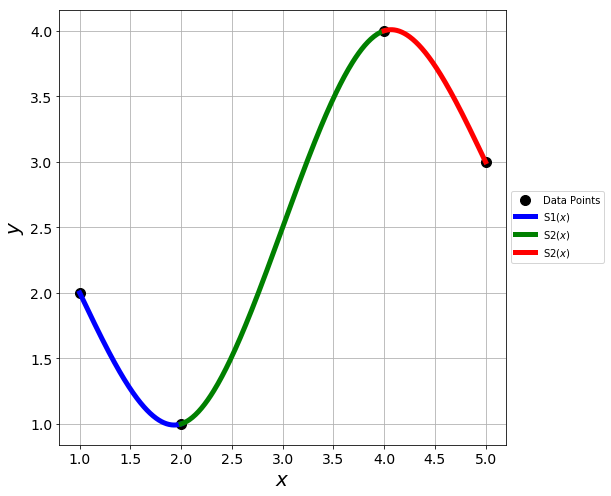

In [4]:
x = np.array([1,2,4,5])
y = np.array([2,1,4,3])
S = cubic_spline(x,y,end='Natural')

x1 = np.linspace(1,2,200)
x2 = np.linspace(2,4,200)
x3 = np.linspace(4,5,200)

S1 = y[0]+S['b'][0]*(x1-x[0])+S['c'][0]*(x1-x[0])**2+S['d'][0]*(x1-x[0])**3
S2 = y[1]+S['b'][1]*(x2-x[1])+S['c'][1]*(x2-x[1])**2+S['d'][1]*(x2-x[1])**3
S3 = y[2]+S['b'][2]*(x3-x[2])+S['c'][2]*(x3-x[2])**2+S['d'][2]*(x3-x[2])**3

plt.figure(figsize=(M,M))
plt.plot(x,y,'k.',markersize=20,label='Data Points')
plt.plot(x1,S1,'b',linewidth=5,label=r'S$1(x)$')
plt.plot(x2,S2,'g',linewidth=5,label=r'S$2(x)$')
plt.plot(x3,S3,'r',linewidth=5,label=r'S$2(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

## Example 2

In [5]:
def show_spline(type_ending='Natural',k1=0, k2=0, p1=0, p2=0):
    #type_ending='Natural'
    x = np.array([1,2,4,5,7,9])
    y = np.array([2,1,4,3,3,4])
    xx=np.linspace(np.min(x),np.max(x),1000)
    S = cubic_spline(x,y,end=type_ending, k1=k1, k2=k2, p1=p1, p2=p2)
    plt.figure(figsize=(M,M))
    plt.plot(xx,cubic_spline_eval(xx,S),'-',linewidth=5,label=r'S$(x)$')
    plt.plot(x,y,'k.',markersize=20,label='Data Points')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()
widgets.interact(show_spline, type_ending=['Natural','Adjusted','Clamped','Parabolically','NaK'],
                k1=(-20,20,1),k2=(-20,20,1),p1=(-2,2,0.2),p2=(-2,2,0.2))

interactive(children=(Dropdown(description='type_ending', options=('Natural', 'Adjusted', 'Clamped', 'Parabolically', 'NaK'), value='Natural'), IntSlider(value=0, description='k1', max=20, min=-20), IntSlider(value=0, description='k2', max=20, min=-20), FloatSlider(value=0.0, description='p1', max=2.0, min=-2.0, step=0.2), FloatSlider(value=0.0, description='p2', max=2.0, min=-2.0, step=0.2), Output()), _dom_classes=('widget-interact',))

<function __main__.show_spline>

<div id='ex'/>

## Exercises
Now, a few questions about splines:
- Create the Clamped Cubic Spline given $(0,0), (1,1), (2,2)$. Consider  $S'_1(x_1) = 0$ y $S'_3(x_3) = 1$. Plot it.
- Can you add another point without recalculating all the coefficients again?
- Implement the 'der' input of the 'cubic_spline_eval' function so we can visualize the derivatives of the spline.
- Add the plots of all the derivatives you consider can be computed into Example 2.

## References

### Scipy Cubic Spline Interpolation
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline


<div id='acknowledgements' />
# Acknowledgements
* _Material created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`) _and assistans: Laura Bermeo, Alvaro Salinas, Axel Simonsen and Martín Villanueva. DI UTFSM. April 2016._
* _Updated by Claudio Torres_ (`ctorres@inf.utfsm.cl`). _DI UTFSM. June 2017._
* _Updated by Claudio Torres_ (`ctorres@inf.utfsm.cl`). _DI UTFSM. May 2018._